In [25]:
import pandas as pd
import seaborn as sns


In [29]:
df = pd.read_csv('data/tweets.csv')
df.head()

,id,Date,User,Tweet,Likes,Comments,Retweets,Views
0,0,2023-04-07 18:01:56+00:00,TheKnowledgeHou,This is your chance to #TapIn to the #TechIndu...,1,0,0,32.0
1,1,2023-04-06 16:04:44+00:00,TheKnowledgeHou,The Knowledge House is hiring #Career Coaches!...,0,0,0,42.0
2,2,2023-04-05 18:02:14+00:00,TheKnowledgeHou,"Let's give it up to Kwame Bullen, our current ...",2,0,0,54.0
3,3,2023-04-04 19:31:11+00:00,TheKnowledgeHou,It’s #TechTuesday!\r\nJoin us for a #DayintheL...,2,1,1,109.0
4,4,2023-04-03 19:02:58+00:00,TheKnowledgeHou,TKH is having #OpenHouses at all of our expans...,3,0,0,87.0


In [ ]:
# drop views columns 
df.drop('Views', axis=1,inplace=True)


In [40]:
# drop user column
df.drop('User', axis=1,inplace=True)

In [44]:
# change date format 

df["Date"] = df["Date"].str.split(" ", expand=True)

In [46]:
df.drop('Time', axis=1,inplace=True)

In [47]:
df.head()

,id,Date,Tweet,Likes,Comments,Retweets
0,0,2023-04-07,This is your chance to #TapIn to the #TechIndu...,1,0,0
1,1,2023-04-06,The Knowledge House is hiring #Career Coaches!...,0,0,0
2,2,2023-04-05,"Let's give it up to Kwame Bullen, our current ...",2,0,0
3,3,2023-04-04,It’s #TechTuesday!\r\nJoin us for a #DayintheL...,2,1,1
4,4,2023-04-03,TKH is having #OpenHouses at all of our expans...,3,0,0


In [48]:
df.to_csv('data/tweets.csv', index=False)

In [49]:
df.dtypes

id           int64
Date        object
Tweet       object
Likes        int64
Comments     int64
Retweets     int64
dtype: object

In [8]:
df.describe()

,id,Likes,Comments,Retweets,Views
count,473.0000,473.000000,473.000000,473.000000,63.000000
mean,236.0000,1.247357,0.050740,0.334038,83.936508
std,136.6876,1.196799,0.219699,0.743933,108.988883
min,0.0000,0.000000,0.000000,0.000000,9.000000
25%,118.0000,1.000000,0.000000,0.000000,45.000000
50%,236.0000,1.000000,0.000000,0.000000,57.000000
75%,354.0000,2.000000,0.000000,0.000000,85.000000
max,472.0000,13.000000,1.000000,7.000000,828.000000


In [9]:
df.isnull().sum()

id            0
Date          0
User          0
Tweet         0
Likes         0
Comments      0
Retweets      0
Views       410
dtype: int64

In [10]:
# drop null values 
clean_data = df.dropna()
clean_data.isnull().sum()

id          0
Date        0
User        0
Tweet       0
Likes       0
Comments    0
Retweets    0
Views       0
dtype: int64

<AxesSubplot: xlabel='Likes', ylabel='Count'>

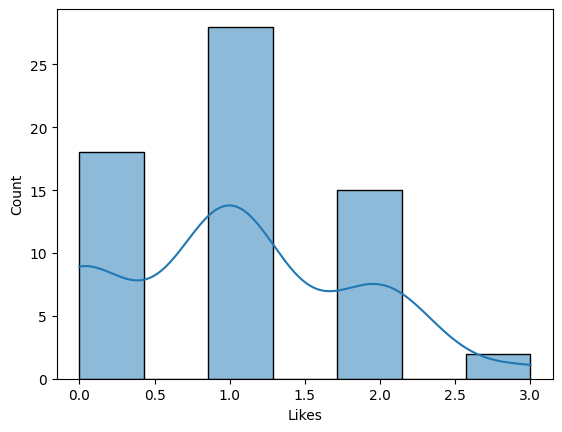

In [11]:
sns.histplot(data=clean_data, x = 'Likes', kde = True)

C:\Users\Tom\AppData\Local\Temp\ipykernel_22712\4000022164.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Date'] = pd.to_datetime(clean_data['Date'])


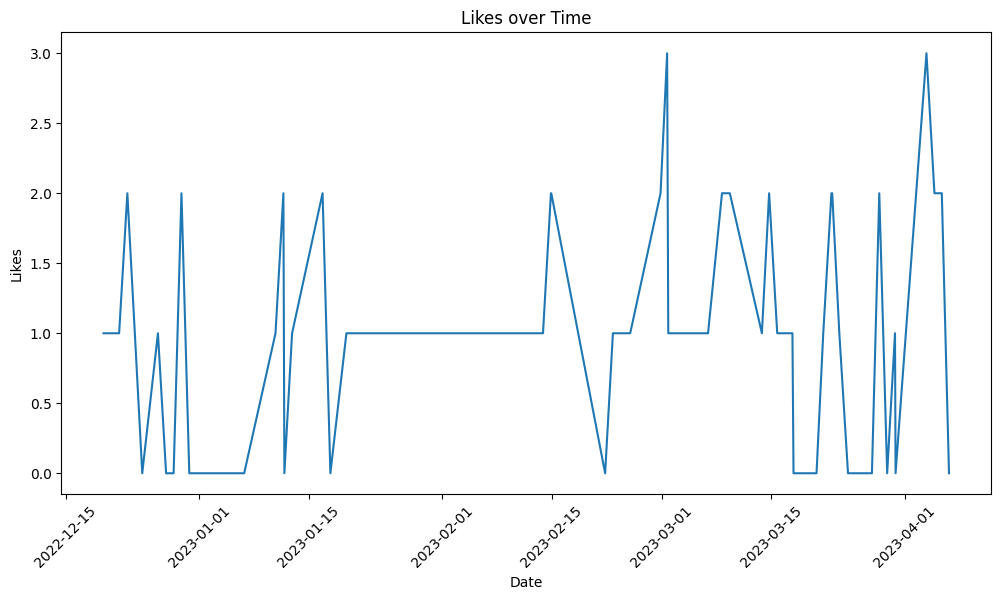

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert 'data' column to a datetime object 
clean_data['Date'] = pd.to_datetime(clean_data['Date'])

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=clean_data, x='Date', y='Likes', ax=ax)

date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.title('Likes over Time')
plt.show()



In [65]:
# Most Commented
clean_data[['Date', 'Tweet', 'Comments']].sort_values(by='Comments', ascending=False).head(10)


,Date,Tweet,Comments
2,2023-04-04 19:31:11+00:00,It’s #TechTuesday!\r\nJoin us for a #DayintheL...,1
0,2023-04-06 16:04:44+00:00,The Knowledge House is hiring #Career Coaches!...,0
47,2023-01-06 18:03:01+00:00,Heart this post if you can use a nice cup of ☕...,0
34,2023-02-06 21:17:28+00:00,#BlackHistoryMonth at The Knowledge House is a...,0
35,2023-01-28 19:10:12+00:00,"As we think of #dataprivacyday, we encourage n...",0
36,2023-01-26 16:11:54+00:00,#Day 2 of #Retreat ! \r\n\r\n#team #coffeetime...,0
37,2023-01-25 20:45:02+00:00,#Day1 of #Retreat ! \r\n\r\n#team #goldenhour ...,0
38,2023-01-24 19:05:12+00:00,TKH has created V.I.P (The #Volunteer Impact P...,0
39,2023-01-23 18:00:35+00:00,Our Fellowship Campaign was a resounding succe...,0
40,2023-01-19 19:05:13+00:00,Looking for potential #apprenticeships this ye...,0


In [66]:
# Most Retweeted
clean_data[['Date', 'Tweet', 'Retweets']].sort_values(by='Retweets', ascending=False).head(10)

,Date,Tweet,Retweets
15,2023-03-17 20:01:19+00:00,The Knowledge House is hiring!\r\nCheck out ou...,2
40,2023-01-19 19:05:13+00:00,Looking for potential #apprenticeships this ye...,1
2,2023-04-04 19:31:11+00:00,It’s #TechTuesday!\r\nJoin us for a #DayintheL...,1
35,2023-01-28 19:10:12+00:00,"As we think of #dataprivacyday, we encourage n...",1
21,2023-03-08 17:02:36+00:00,Behind every successful woman is a tribe of ot...,1
55,2022-12-26 18:02:20+00:00,The Knowledge House extends warm greetings and...,1
25,2023-02-28 20:55:11+00:00,There are many ways to celebrate #BlackHistory...,1
41,2023-01-17 18:03:09+00:00,@NYCC4H is having a free #healthfair every 2nd...,0
44,2023-01-11 21:11:28+00:00,@DIYGirls ❤️❤️❤️,0
43,2023-01-12 20:45:15+00:00,"#ThrowbackThursday to when Alex Ortiz, one of ...",0


In [67]:
# Most Liked
clean_data[['Date', 'Tweet', 'Likes']].sort_values(by='Likes', ascending=False).head(10)

,Date,Tweet,Likes
3,2023-04-03 19:02:58+00:00,TKH is having #OpenHouses at all of our expans...,3
24,2023-03-01 17:02:25+00:00,Meet Emilie Dionisio! She's a passionate #Cybe...,3
31,2023-02-14 21:15:14+00:00,Sending lots of love to our #UXUI Fellows! Tod...,2
11,2023-03-22 18:30:30+00:00,Applications are officially open! Both KKCF &a...,2
30,2023-02-14 22:21:32+00:00,Westchester needs to invest in a more equitabl...,2
25,2023-02-28 20:55:11+00:00,There are many ways to celebrate #BlackHistory...,2
21,2023-03-08 17:02:36+00:00,Behind every successful woman is a tribe of ot...,2
20,2023-03-09 17:02:12+00:00,Rigoberto Obregón for the win! Shout out to ou...,2
18,2023-03-14 17:20:19+00:00,This weekend our staff had the privilege to at...,2
45,2023-01-11 18:10:10+00:00,"Thank you, @DIYGirls for your interest in expo...",2


<AxesSubplot: xlabel='Comments', ylabel='Count'>

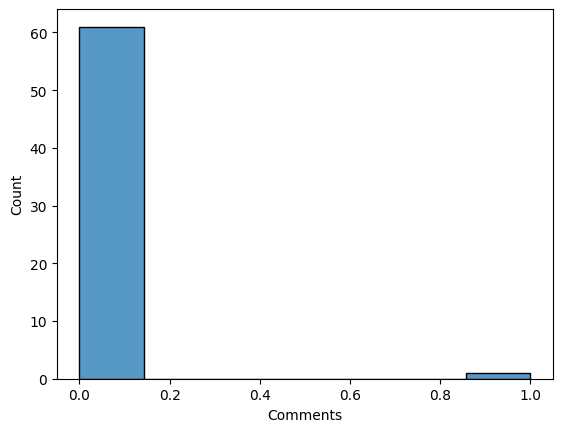

In [14]:
sns.histplot(data=clean_data, x = 'Comments')

<AxesSubplot: xlabel='Retweets', ylabel='Count'>

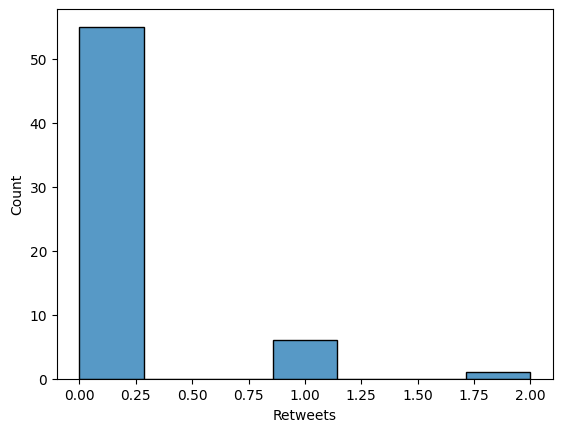

In [15]:
sns.histplot(data=clean_data, x = 'Retweets')

<AxesSubplot: >

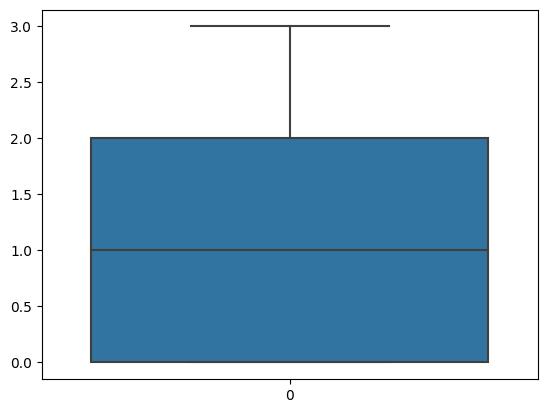

In [69]:
# box plot
sns.boxplot(clean_data['Likes'])

<AxesSubplot: >

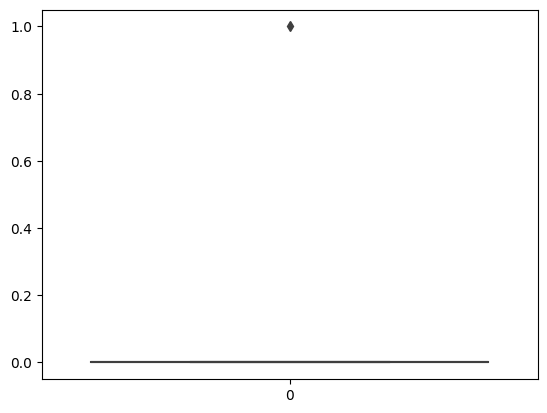

In [70]:
sns.boxplot(clean_data['Comments'])

<AxesSubplot: >

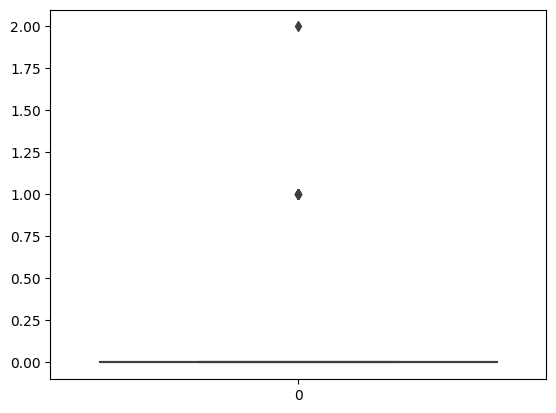

In [12]:
sns.boxplot(clean_data['Retweets'])

In [23]:
# confidence intervals
import numpy as np 
import scipy.stats as st

st.t.interval(alpha=0.90, df=len(clean_data['Likes'])-1, loc=np.mean(clean_data['Likes']), scale=st.sem(clean_data['Likes'])) 



C:\Users\Tom\AppData\Local\Temp\ipykernel_39664\229834111.py:5: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(clean_data['Likes'])-1, loc=np.mean(clean_data['Likes']), scale=st.sem(clean_data['Likes']))


(0.8448292444061181, 1.1869167873399136)

In [22]:
st.t.interval(alpha=0.90, df=len(clean_data['Comments'])-1, loc=np.mean(clean_data['Comments']), scale=st.sem(clean_data['Comments'])) 

C:\Users\Tom\AppData\Local\Temp\ipykernel_39664\2120312182.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(clean_data['Comments'])-1, loc=np.mean(clean_data['Comments']), scale=st.sem(clean_data['Comments']))


(-0.0106318120999449, 0.042377843845976634)

In [21]:
st.t.interval(alpha=0.90, df=len(clean_data['Retweets'])-1, loc=np.mean(clean_data['Retweets']), scale=st.sem(clean_data['Retweets'])) 

C:\Users\Tom\AppData\Local\Temp\ipykernel_39664\729474057.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(clean_data['Retweets'])-1, loc=np.mean(clean_data['Retweets']), scale=st.sem(clean_data['Retweets']))


(0.046901675247026264, 0.20706657872122763)

In [72]:
# KS - test
import scipy.stats as stats

stats.kstest(clean_data["Likes"], stats.norm.cdf, args=(clean_data["Likes"].mean(), clean_data["Likes"].std()))

KstestResult(statistic=0.23365607427637575, pvalue=0.001846621837978124)

In [73]:
stats.kstest(clean_data["Comments"], stats.norm.cdf, args=(clean_data["Comments"].mean(), clean_data["Comments"].std()))

KstestResult(statistic=0.5344008187258724, pvalue=4.5239794761264796e-17)

In [74]:
stats.kstest(clean_data["Retweets"], stats.norm.cdf, args=(clean_data["Retweets"].mean(), clean_data["Retweets"].std()))

KstestResult(statistic=0.5188605381046348, pvalue=4.782919163316906e-16)

In [ ]:
# scatter plots

In [ ]:
# correlation map 